In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [223]:
# import the data set
df = pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **Data Preprocessing**

In [224]:
# check the nill values 
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [225]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [226]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [228]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [229]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [230]:
columns = ['Survived', 'Pclass', 'Sex', 'SibSp',
       'Parch', 'Embarked']

for i in columns:
    print(f"Unique values in {i}:")
    print(df[i].unique())
    print('-------------------------')

Unique values in Survived:
[0 1]
-------------------------
Unique values in Pclass:
[3 1 2]
-------------------------
Unique values in Sex:
['male' 'female']
-------------------------
Unique values in SibSp:
[1 0 3 4 2 5 8]
-------------------------
Unique values in Parch:
[0 1 2 5 3 4 6]
-------------------------
Unique values in Embarked:
['S' 'C' 'Q' nan]
-------------------------


# Deal with Missing Values


In [231]:

df['Age'].fillna(df['Age'].mean(),inplace=True)

In [232]:
df['Embarked'].fillna(df['Embarked'].mode(),inplace=True)

In [233]:
df['Cabin'].isna().sum()


np.int64(687)

In [234]:
df['Cabin'].fillna('unknown',inplace=True)

In [235]:
df['deck_cabin'] = df['Cabin'].str[0] # check the class A,B,C,D... firts letter are in deck_cabin

In [236]:
df.groupby('deck_cabin')['Survived'].mean()

deck_cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
u    0.299854
Name: Survived, dtype: float64

In [237]:
df['Cabin'] = df['Cabin'].fillna('U')

In [238]:
df['Cabin'].isnull().sum()

np.int64(0)

#  Visualize Survival Rate by deck_cabin

## What This Means:
1. deck_cabins D, E, and B had the highest survival rates (75%+).
2. deck_cabin u (unknown) had a low survival rate (~30%).
3. deck_cabin T had 0% survival (only 1 person in this deck_cabin).

This supports the idea that higher deck_cabins (1st class) had a better chance of survival.

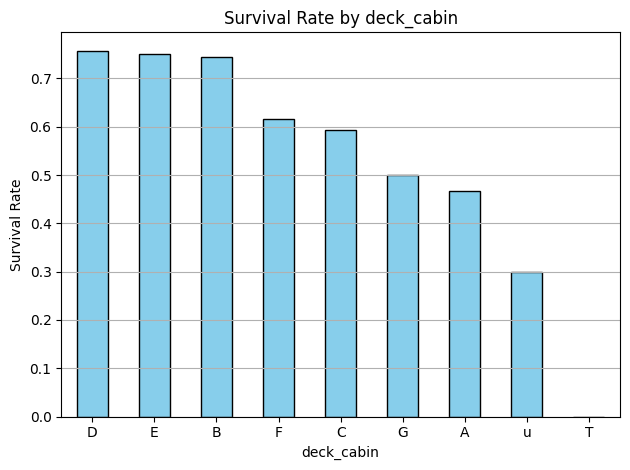

In [239]:
deck_cabin_survival = df.groupby('deck_cabin')['Survived'].mean().sort_values(ascending=False)

deck_cabin_survival.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Survival Rate by deck_cabin')
plt.ylabel('Survival Rate')
plt.xlabel('deck_cabin')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# You can calculate total family members aboard:
## 1. Parch 
1. Parent = mother or father
2. Child = son, daughter, stepchild, adopted Child
## 2. SibSp
1. Siblings = brothers and sisters (including half-siblings).
2. Spouse = husband or wife.

+1 including the passenger themselves in the total count.


In [240]:
df['Familysize'] = df['SibSp'] + df['Parch'] + 1

In [241]:
df['deck_cabin']

0      u
1      C
2      u
3      C
4      u
      ..
886    u
887    B
888    u
889    C
890    u
Name: deck_cabin, Length: 891, dtype: object

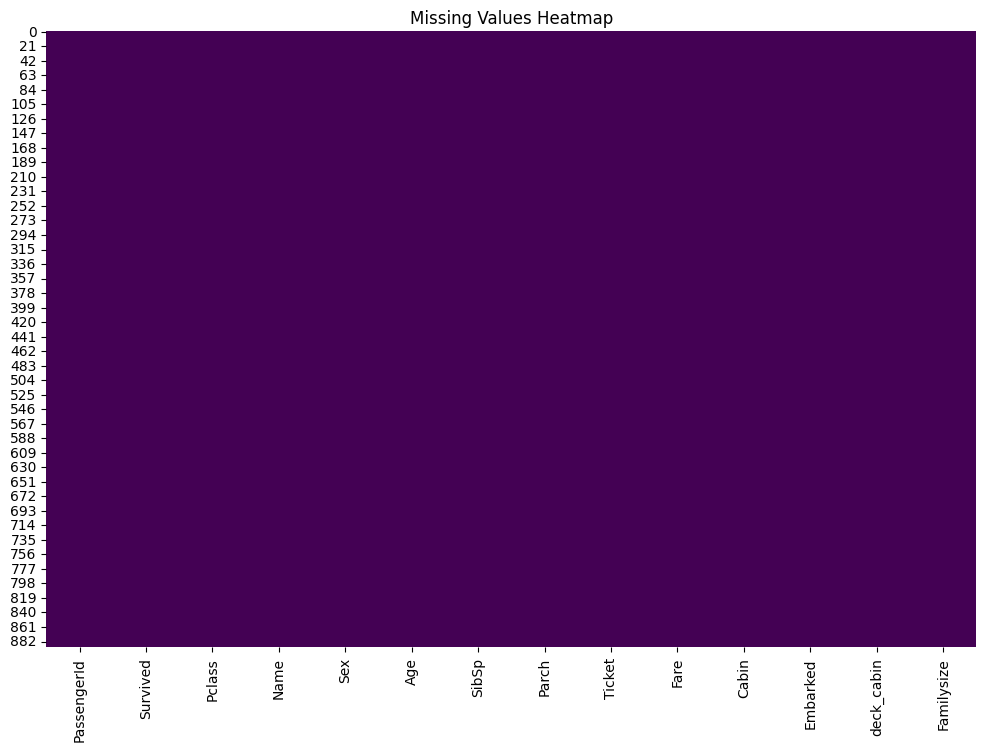

In [242]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis') 
plt.title('Missing Values Heatmap')

plt.show()

# Survival Check on the base of Gender.

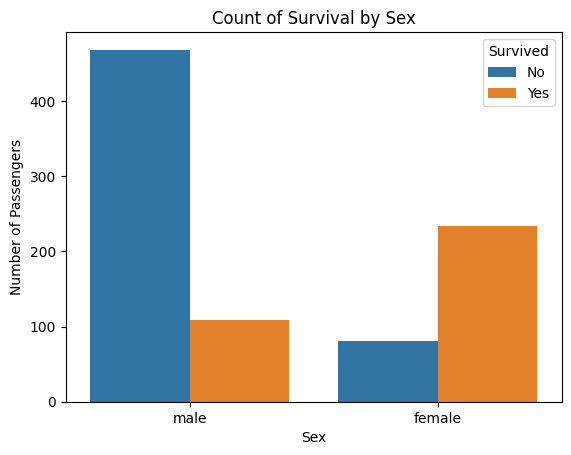

In [243]:

sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Count of Survival by Sex")
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# Check the Survival Rate on the base of Age

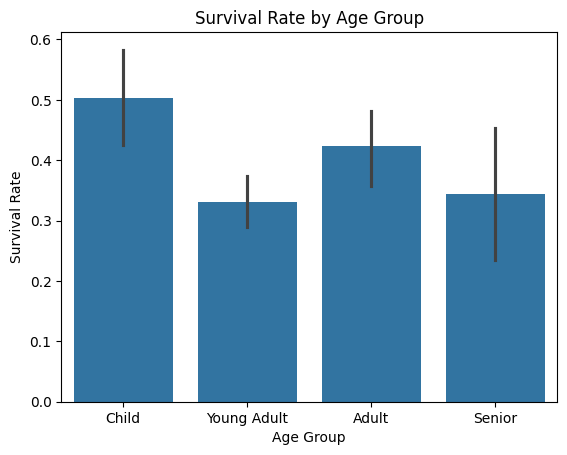

In [244]:
# Create age bins
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 18, 30, 50, 80], 
                        labels=['Child', 'Young Adult', 'Adult', 'Senior'])

sns.barplot(x='AgeGroup', y='Survived', data=df)
plt.title("Survival Rate by Age Group")
plt.ylabel('Survival Rate')
plt.xlabel('Age Group')
plt.show()



In [245]:
df['Fare'].unique()


array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [246]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,deck_cabin,Familysize,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,unknown,S,u,2,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,2,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,unknown,S,u,1,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,2,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,unknown,S,u,1,Adult


# **Normalize and Encode Data**

In [247]:
df['Name_title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand=False)


In [248]:
df['Name_title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [249]:
Name_title_survival = df.groupby('Name_title')['Survived'].mean().sort_values(ascending=False)
print(Name_title_survival)


Name_title
Countess    1.000000
Ms          1.000000
Lady        1.000000
Mme         1.000000
Mlle        1.000000
Sir         1.000000
Mrs         0.792000
Miss        0.697802
Master      0.575000
Major       0.500000
Col         0.500000
Dr          0.428571
Mr          0.156673
Capt        0.000000
Don         0.000000
Jonkheer    0.000000
Rev         0.000000
Name: Survived, dtype: float64


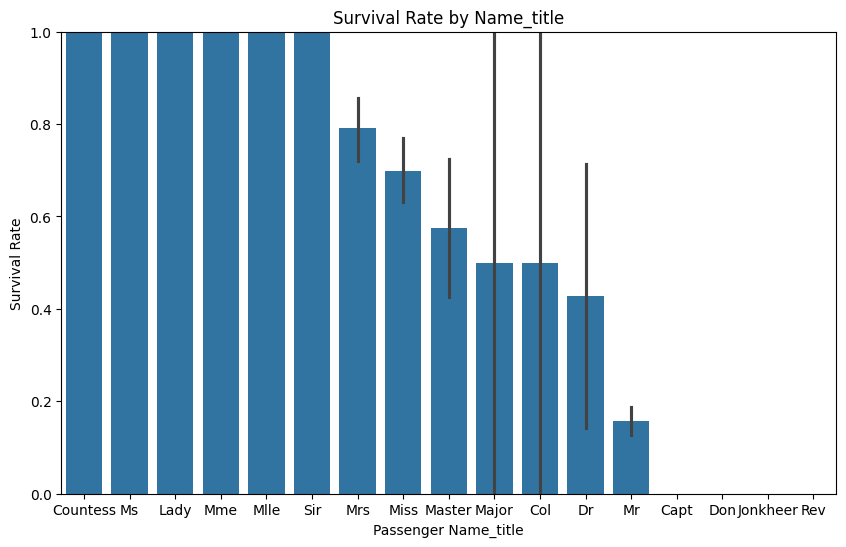

In [250]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Name_title', y='Survived', data=df, order=Name_title_survival.index)
plt.title('Survival Rate by Name_title')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Name_title')
plt.ylim(0, 1)
plt.show()

In [251]:
df = df.dropna(subset=['Embarked'])


In [252]:
lessthanten = []
for col in df.columns:
    lessthanten.append(df[col].nunique() < 10)

for col in df[df.columns[lessthanten]]:
    print(col, df[col].unique())


Survived [0 1]
Pclass [3 1 2]
Sex ['male' 'female']
SibSp [1 0 3 4 2 5 8]
Parch [0 1 2 5 3 4 6]
Embarked ['S' 'C' 'Q']
deck_cabin ['u' 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']
Familysize [ 2  1  5  3  7  6  4  8 11]
AgeGroup ['Young Adult', 'Adult', 'Senior', 'Child']
Categories (4, object): ['Child' < 'Young Adult' < 'Adult' < 'Senior']


... Length may help identify patterns

In [253]:
df['Ticket'] = df['Ticket'].apply(len)

1. Logistic Regression:- Based on distance & gradients
2. Gradient Descent:-    Uses dot products and distances
3. Neural Networks:-     Distance-based algorithm
4. SVM:-                 Helps with faster, stable convergence
5. KNN:-                 Works better when features are similarly scaled

# StandardScaler:-

In [254]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['Fare'] = scaler.fit_transform(df[['Fare']])

# LabelEncoder:-

In [255]:
from sklearn.preprocessing import LabelEncoder

In [256]:
le = LabelEncoder()

df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])
df['deck_cabin'] = le.fit_transform(df['deck_cabin'])
df['AgeGroup'] = le.fit_transform(df['AgeGroup'])
df['Name_title'] = le.fit_transform(df['Name_title'])



# MinMaxScaler:-

In [257]:
from sklearn.preprocessing import MinMaxScaler

In [258]:
scaler = MinMaxScaler()

scale_cols = ['Fare', 'Age', 'SibSp', 'Parch'] 
df[scale_cols] = scaler.fit_transform(df[scale_cols])

In [260]:
df = df.drop(['Name','Age', 'Cabin'], axis=1)


In [261]:
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked,deck_cabin,Familysize,AgeGroup,Name_title
0,1,0,3,1,0.125,0.0,9,0.014151,2,8,2,3,12
1,2,1,1,0,0.125,0.0,8,0.139136,0,2,2,0,13
2,3,1,3,0,0.000,0.0,16,0.015469,2,8,1,3,9
3,4,1,1,0,0.125,0.0,6,0.103644,2,2,2,0,13
4,5,0,3,1,0.000,0.0,6,0.015713,2,8,1,0,12
